In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

#this will cause text to be exported as 'true text' which can be edited in Adobe Illustrator
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42

In [3]:
pl.style.use('fabiostyle')

# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'lick_behavior_FIGURES'

In [5]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'add_significance', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'load_all_animals_vars', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [6]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [7]:
def report_stats (array1, array2, sig_func=None,mcc=1,loops=None):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        U = sig_func(array1, array2)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        p = sig_func(array1, array2)[-1]
        print "U =",U,"p =",p*mcc,"r =",r
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        cohens_d = (np.mean(array1)-np.mean(array2))/np.sqrt((np.std(array1)**2+np.std(array2)**2)/2)
        p = sig_func(array1, array2)[-1]
        print sig_func(array1, array2),"d =", cohens_d, 'corrected p =',p*mcc

def report_stats_chance (array1, chance=0.5, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        U = sig_func(subtracted)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        print sig_func(subtracted),"r =",r
    elif sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        cohens_d = (np.mean(array1)-chance)/np.std(array1)
        print sig_func(array1,chance),"d =",cohens_d

In [14]:
sessions ='pre', 'post'

In [19]:
import os
currentpath = os.getcwd()
currentpath

'/media/data/DATA1/data/odor_ass_learning_2019/4odor/results/notebooks'

In [10]:
#pre_animals_dHPC  = 'dHPC4_145','dHPC5_1','dHPC5_2','dHPC5_3'
pre_animals_vHPC = 'c3m1', 'c3m2', 'c3f3', 'c10m8'
post_animals_vHPC = '90','90_475','91','93_500','93_580','93_720','93_810','c3m1', 'c3m2', 'c3f3', 'c10m8'
pre_animals_dHPC =  'dhpc35','dhpc36'
post_animals_dHPC = 'dhpc35','dhpc36','dhpc35_254'

tot_animals_pre = pre_animals_dHPC + pre_animals_vHPC
tot_animals_post = post_animals_dHPC + post_animals_vHPC


#  1 or 2 or 5 or 6 is CS+ while 3/4/7/8 are CS-

In [57]:
for area in ['v','d','t']:
        for trial in ['STIM1','STIM2','STIM3','STIM4']:
            if area == 'v':
                for day in ['pre','post']:
                    exec("%s_tc_%s_%s = []"%(day,area,trial))
                    for ani in pre_animals_vHPC:
                        exec("licks_tc=ut.load_variable('licks_tc','../%s/%s/notebooks/autorestore/preprocessing')"%(ani,day))
                        exec("%s=ut.load_variable('is_%st','../%s/%s/notebooks/autorestore/preprocessing')"%(trial,trial,ani,day))
                        exec("%s_tc_%s_%s.append(np.mean(licks_tc[%s]))"%(day,area,trial,trial))
            elif area == 'd':
                for day in ['pre','post']:
                    exec("%s_tc_%s_%s = []"%(day,area,trial))
                    if day == 'pre':
                        for ani in pre_animals_dHPC:
                            exec("licks_tc=ut.load_variable('licks_tc','../%s/%s/notebooks/autorestore/preprocessing')"%(ani,day))
                            exec("%s=ut.load_variable('is_%st','../%s/%s/notebooks/autorestore/preprocessing')"%(trial,trial,ani,day))
                            exec("%s_tc_%s_%s.append(np.mean(licks_tc[%s]))"%(day,area,trial,trial))
                    else:
                        for ani in post_animals_dHPC:
                            exec("licks_tc=ut.load_variable('licks_tc','../%s/%s/notebooks/autorestore/preprocessing')"%(ani,day))
                            exec("%s=ut.load_variable('is_%st','../%s/%s/notebooks/autorestore/preprocessing')"%(trial,trial,ani,day))
                            exec("%s_tc_%s_%s.append(np.mean(licks_tc[%s]))"%(day,area,trial,trial))
            else:
                for day in ['pre','post']:
                    exec("%s_tc_%s_%s = []"%(day,area,trial))
                    if day == 'pre':
                        for ani in tot_animals_pre:
                                exec("licks_tc=ut.load_variable('licks_tc','../%s/%s/notebooks/autorestore/preprocessing')"%(ani,day))
                                exec("%s=ut.load_variable('is_%st','../%s/%s/notebooks/autorestore/preprocessing')"%(trial,trial,ani,day))
                                exec("%s_tc_%s_%s.append(np.mean(licks_tc[%s]))"%(day,area,trial,trial))
                    else:
                        for ani in tot_animals_post:
                            exec("licks_tc=ut.load_variable('licks_tc','../%s/%s/notebooks/autorestore/preprocessing')"%(ani,day))
                            exec("%s=ut.load_variable('is_%st','../%s/%s/notebooks/autorestore/preprocessing')"%(trial,trial,ani,day))
                            exec("%s_tc_%s_%s.append(np.mean(licks_tc[%s]))"%(day,area,trial,trial))

In [58]:
for area in ['v','d','t']:
    if area == 'v':
        for day in ['pre','post']:
            exec("%s_di_%s = []"%(day,area))
            for ani in pre_animals_vHPC:
                exec("%s_di_%s.append(ut.load_variable('lick_di','../%s/%s/notebooks/autorestore/preprocessing'))"%(day,area,ani,day))
    elif area == 'd':
        for day in ['pre','post']:
            exec("%s_di_%s = []"%(day,area))
            if day == 'pre':
                for ani in pre_animals_dHPC:
                    exec("%s_di_%s.append(ut.load_variable('lick_di','../%s/%s/notebooks/autorestore/preprocessing'))"%(day,area,ani,day))
            else:
                for ani in post_animals_dHPC:
                    exec("%s_di_%s.append(ut.load_variable('lick_di','../%s/%s/notebooks/autorestore/preprocessing'))"%(day,area,ani,day))
    else:
        for day in ['pre','post']:
            exec("%s_di_%s = []"%(day,area))
            if day == 'pre':
                for ani in tot_animals_pre:
                    exec("%s_di_%s.append(ut.load_variable('lick_di','../%s/%s/notebooks/autorestore/preprocessing'))"%(day,area,ani,day))
            else:
                for ani in tot_animals_post:
                    exec("%s_di_%s.append(ut.load_variable('lick_di','../%s/%s/notebooks/autorestore/preprocessing'))"%(day,area,ani,day))

In [59]:
from scipy.stats import sem
from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y,)
    p = sig_func(array1, array2)[-1]
    print p
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+.2,
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=5)
    return sig_value, p

0.468093146737
0.28758676596
0.00055308909204
S1 vs S2 pre: U = 18.0 p = 0.936186293473 r = 0.0
None
S3 vs S4 pre: U = 14.0 p = 0.57517353192 r = -0.184900065408
None
CS+ vs CS- pre: U = 129.0 p = 0.00110617818408 r = 0.671751442127
None
0.409123087535
0.267055872191
6.92510444533e-11
S1 vs S2 post: U = 92.5 p = 0.818246175071 r = -0.047791768707
None
S3 vs S4 post: U = 84.0 p = 0.534111744382 r = -0.121651774891
None
CS+ vs CS- post: U = 784.0 p = 1.38502088907e-10 r = 0.858395075279
None


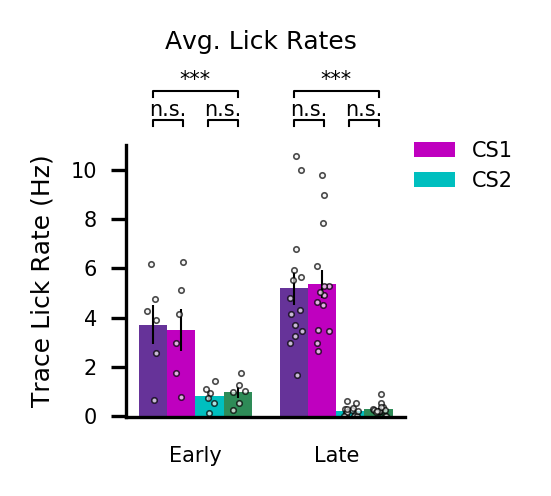

In [43]:
from matplotlib.patches import Patch
labels = ['Early','Late']
area = 't'

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

to_plot = ['pre','post']

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
tt_colors = ['rebeccapurple','m','c','seagreen']
fig, ax = pl.subplots(figsize=(1.2,1.2))
pvs=[]

for day,i in zip(to_plot,range(2)):
    if i ==0:
        co=0
        for odor in ['STIM1','STIM2','STIM3','STIM4']:
            exec("%s_tc_%s_%s = [x/2 for x in %s_tc_%s_%s]"%(day,area,odor,day,area,odor))
            exec("e = np.array(sstats.sem(%s_tc_%s_%s))"%(day,area,odor))
            exec("ax.bar(i - width/2 + co*width, np.mean(%s_tc_%s_%s), width,color=tt_colors[co],yerr=e)"%(day,area,odor))
            exec("ax.scatter(i-width/2+ co*width+np.random.random(np.array(%s_tc_%s_%s).size)*width/2-width/4.5,%s_tc_%s_%s,\
                  color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')"%(day,area,odor,day,area,odor))
            co=co+1
    else:
        co=0
        
        for odor in ['STIM1','STIM2','STIM3','STIM4']:
            exec("%s_tc_%s_%s = [x/2 for x in %s_tc_%s_%s]"%(day,area,odor,day,area,odor))
            exec("e = np.array(sstats.sem(%s_tc_%s_%s))"%(day,area,odor))
            exec("ax.bar(i - width/2 + co*width, np.mean(%s_tc_%s_%s), width,color=tt_colors[co],yerr=e)"%(day,area,odor))
            exec("ax.scatter(i-width/2+ co*width+np.random.random(np.array(%s_tc_%s_%s).size)*width/2-width/4.5,%s_tc_%s_%s,\
                  color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')"%(day,area,odor,day,area,odor))
            co=co+1


t_reward_pre = pre_tc_t_STIM1 + pre_tc_t_STIM2
t_CSm_pre = pre_tc_t_STIM3 + pre_tc_t_STIM4
t_reward_post = post_tc_t_STIM1 + post_tc_t_STIM2
t_CSm_post = post_tc_t_STIM3 + post_tc_t_STIM4
            
for day in to_plot:
    if day =='pre':
 
        exec("pvs.append(add_significance(ax, %s_tc_%s_STIM1, %s_tc_%s_STIM2,-.10,0.11,12))"%(day,area,day,area))
        exec("pvs.append(add_significance(ax, %s_tc_%s_STIM3, %s_tc_%s_STIM4,.29,0.50,12))"%(day,area,day,area))
        pvs.append(add_significance(ax, t_reward_pre, t_CSm_pre,-.10,0.50,13.2))
        print "S1 vs S2 pre:",report_stats(eval("%s_tc_%s_STIM1"%(day,area)), eval("%s_tc_%s_STIM2"%(day,area)),
                                       loops=len(eval("%s_tc_%s_STIM1"%(day, area))))
        print "S3 vs S4 pre:",report_stats(eval("%s_tc_%s_STIM3"%(day,area)), eval("%s_tc_%s_STIM4"%(day,area)),
                                       loops=len(eval("%s_tc_%s_STIM3"%(day, area))))
        print "CS+ vs CS- pre:", report_stats(t_reward_pre, t_CSm_pre, loops=len(t_reward_pre))

    else:
        exec("pvs.append(add_significance(ax, %s_tc_%s_STIM1, %s_tc_%s_STIM2,1+-.10,1+0.11,12))"%(day,area,day,area))
        exec("pvs.append(add_significance(ax, %s_tc_%s_STIM3, %s_tc_%s_STIM4,1+.29,1+0.50,12))"%(day,area,day,area))
        pvs.append(add_significance(ax, t_reward_post, t_CSm_post,1+-.10,1+0.50,13.2))
        print "S1 vs S2 post:",report_stats(eval("%s_tc_%s_STIM1"%(day,area)), eval("%s_tc_%s_STIM2"%(day,area)),
                                       loops=len(eval("%s_tc_%s_STIM1"%(day, area))))
        print "S3 vs S4 post:",report_stats(eval("%s_tc_%s_STIM3"%(day,area)), eval("%s_tc_%s_STIM4"%(day,area)),
                                       loops=len(eval("%s_tc_%s_STIM3"%(day, area))))
        print "CS+ vs CS- post:", report_stats(t_reward_post, t_CSm_post, loops=len(t_reward_post))
        
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Trace Lick Rate (Hz)',fontsize=6)
#ax.set_title('Decoding During CS')
ax.set_ylim(-.03,11)
x = [.2,1.2]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='m'),Patch(facecolor='c')],['CS1','CS2','CS3','CS4'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Avg. Lick Rates',y=1.2,fontsize=6)

fig.savefig('../../../results/final-ish figures/%s_4odor_all_mice_trace_lick_bars.pdf'%NOTEBOOK_NAME)

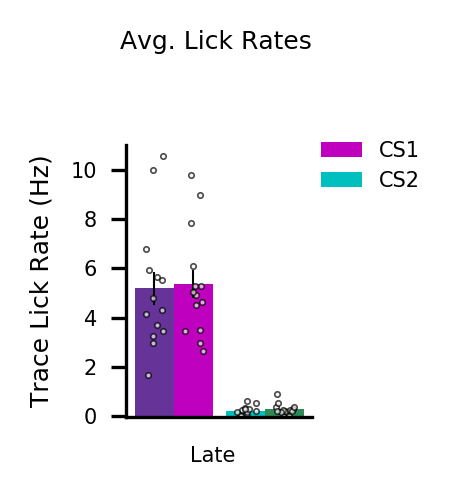

In [60]:
from matplotlib.patches import Patch
labels = ['Late']
area = 't'

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

to_plot = ['post']

tt_colors = ['rebeccapurple','m','c','seagreen']
fig, ax = pl.subplots(figsize=(.8,1.2))
pvs=[]

for day,i in zip(to_plot,range(1)):
        co=0
        for odor in ['STIM1','STIM2']:
            exec("%s_tc_%s_%s = [x/2 for x in %s_tc_%s_%s]"%(day,area,odor,day,area,odor))
            exec("e = np.array(sstats.sem(%s_tc_%s_%s))"%(day,area,odor))
            exec("ax.bar(i - width/2 + co*width, np.mean(%s_tc_%s_%s), width,color=tt_colors[co],yerr=e)"%(day,area,odor))
            exec("ax.scatter(i-width/2+ co*width+np.random.random(np.array(%s_tc_%s_%s).size)*width/2-width/4.5,%s_tc_%s_%s,\
                  color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')"%(day,area,odor,day,area,odor))
            co=co+1
        co=2
        for odor in ['STIM3','STIM4']:
            exec("%s_tc_%s_%s = [x/2 for x in %s_tc_%s_%s]"%(day,area,odor,day,area,odor))
            exec("e = np.array(sstats.sem(%s_tc_%s_%s))"%(day,area,odor))
            exec("ax.bar(i - width/2 + co*width+.1, np.mean(%s_tc_%s_%s), width,color=tt_colors[co],yerr=e)"%(day,area,odor))
            exec("ax.scatter(i-width/2+ co*width+.1+np.random.random(np.array(%s_tc_%s_%s).size)*width/2-width/4.5,%s_tc_%s_%s,\
                  color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')"%(day,area,odor,day,area,odor))
            co=co+1

t_reward_pre = pre_tc_t_STIM1 + pre_tc_t_STIM2
t_CSm_pre = pre_tc_t_STIM3 + pre_tc_t_STIM4
t_reward_post = post_tc_t_STIM1 + post_tc_t_STIM2
t_CSm_post = post_tc_t_STIM3 + post_tc_t_STIM4
            
#for day in to_plot:
#    if day =='pre':
# 
#        exec("pvs.append(add_significance(ax, %s_tc_%s_STIM1, %s_tc_%s_STIM2,-.10,0.11,12))"%(day,area,day,area))
#        exec("pvs.append(add_significance(ax, %s_tc_%s_STIM3, %s_tc_%s_STIM4,.29,0.50,12))"%(day,area,day,area))
#        pvs.append(add_significance(ax, t_reward_pre, t_CSm_pre,-.10,0.50,13.2))
#        print "S1 vs S2 pre:",report_stats(eval("%s_tc_%s_STIM1"%(day,area)), eval("%s_tc_%s_STIM2"%(day,area)),
#                                       loops=len(eval("%s_tc_%s_STIM1"%(day, area))))
#        print "S3 vs S4 pre:",report_stats(eval("%s_tc_%s_STIM3"%(day,area)), eval("%s_tc_%s_STIM4"%(day,area)),
#                                       loops=len(eval("%s_tc_%s_STIM3"%(day, area))))
#        print "CS+ vs CS- pre:", report_stats(t_reward_pre, t_CSm_pre, loops=len(t_reward_pre))
#
#    else:
#        exec("pvs.append(add_significance(ax, %s_tc_%s_STIM1, %s_tc_%s_STIM2,1+-.10,1+0.11,12))"%(day,area,day,area))
#        exec("pvs.append(add_significance(ax, %s_tc_%s_STIM3, %s_tc_%s_STIM4,1+.29,1+0.50,12))"%(day,area,day,area))
#        pvs.append(add_significance(ax, t_reward_post, t_CSm_post,1+-.10,1+0.50,13.2))
#        print "S1 vs S2 post:",report_stats(eval("%s_tc_%s_STIM1"%(day,area)), eval("%s_tc_%s_STIM2"%(day,area)),
#                                       loops=len(eval("%s_tc_%s_STIM1"%(day, area))))
#        print "S3 vs S4 post:",report_stats(eval("%s_tc_%s_STIM3"%(day,area)), eval("%s_tc_%s_STIM4"%(day,area)),
#                                       loops=len(eval("%s_tc_%s_STIM3"%(day, area))))
#        print "CS+ vs CS- post:", report_stats(t_reward_post, t_CSm_post, loops=len(t_reward_post))
        
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Trace Lick Rate (Hz)',fontsize=6)
#ax.set_title('Decoding During CS')
ax.set_ylim(-.03,11)
x = [.3]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='m'),Patch(facecolor='c')],['CS1','CS2','CS3','CS4'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Avg. Lick Rates',y=1.2,fontsize=6)

fig.savefig('../../../results/final-ish figures/%s_4odor_all_mice_trace_lick_bars_LATE.pdf'%NOTEBOOK_NAME)

0.122639058403
0.040427799185


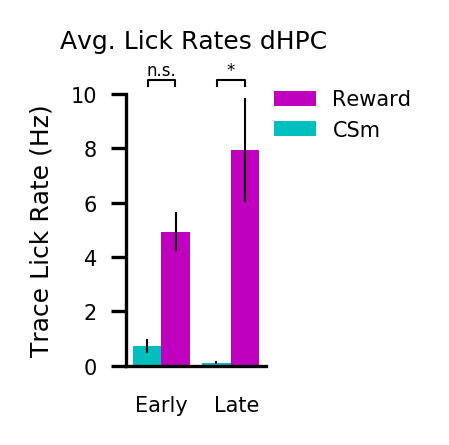

In [56]:
from matplotlib.patches import Patch
labels = ['Early','Late']
area = 'd'

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

to_plot = ['pre','post']

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(.6,1.2))
pvs=[]

for day,i in zip(to_plot,range(2)):
    if i ==0:
        exec("%s_tc_%s_CSm = [x/2 for x in %s_tc_%s_CSm]"%(day,area,day,area))
        exec("e = np.array(sstats.sem(%s_tc_%s_CSm))"%(day,area))
        exec("ax.bar(i - width/2, np.mean(%s_tc_%s_CSm), width,color='c',yerr=e)"%(day,area))
        exec("%s_tc_%s_reward = [x/2 for x in %s_tc_%s_reward]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_reward))"%(day,area))
        exec("ax.bar(i + width/2,  np.mean(%s_tc_%s_reward), width,color='m',yerr=l)"%(day,area))
    else:
        exec("%s_tc_%s_CSm = [x/2 for x in %s_tc_%s_CSm]"%(day,area,day,area))
        exec("e = np.array(sstats.sem(%s_tc_%s_CSm))"%(day,area))
        exec("ax.bar(i-.4 - width/2, np.mean(%s_tc_%s_CSm), width, color='c',yerr=e)"%(day,area))
        exec("%s_tc_%s_reward = [x/2 for x in %s_tc_%s_reward]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_reward))"%(day,area))
        exec("ax.bar(i-.4 + width/2,  np.mean(%s_tc_%s_reward), width,color='m',yerr=l)"%(day,area))
        
for day in to_plot:
    if day =='pre':
        exec("pvs.append(add_significance(ax, %s_tc_%s_CSm, %s_tc_%s_reward,-.12,0.12,10.5))"%(day,area,day,area))
    else:
        exec("pvs.append(add_significance(ax, %s_tc_%s_CSm, %s_tc_%s_reward,-.12+.6,0.12+.6,10.5))"%(day,area,day,area))
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Trace Lick Rate (Hz)',fontsize=6)
#ax.set_title('Decoding During CS')
ax.set_ylim(0,10)
x = [0,.65]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='m'),Patch(facecolor='c')],['Reward','CSm'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Avg. Lick Rates dHPC',y=1.06,fontsize=6)
fig.savefig('../../../results/final-ish figures/%s_4odor_dorsal_mice_trace_lick_bars.pdf'%NOTEBOOK_NAME)

0.0561755988452
0.0151914109883


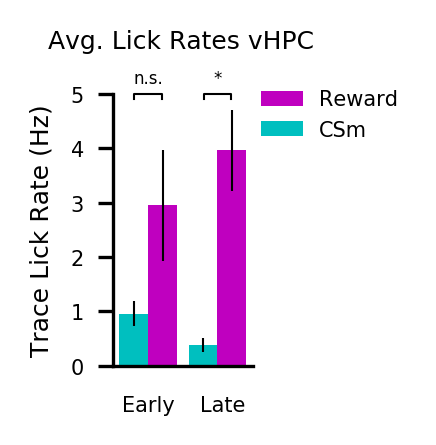

In [57]:
from matplotlib.patches import Patch
labels = ['Early','Late']
area = 'v'

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

to_plot = ['pre','post']

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(.6,1.2))
pvs=[]

for day,i in zip(to_plot,range(2)):
    if i ==0:
        exec("%s_tc_%s_CSm = [x/2 for x in %s_tc_%s_CSm]"%(day,area,day,area))
        exec("e = np.array(sstats.sem(%s_tc_%s_CSm))"%(day,area))
        exec("ax.bar(i - width/2, np.mean(%s_tc_%s_CSm), width,color='c',yerr=e)"%(day,area))
        exec("%s_tc_%s_reward = [x/2 for x in %s_tc_%s_reward]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_reward))"%(day,area))
        exec("ax.bar(i + width/2,  np.mean(%s_tc_%s_reward), width,color='m',yerr=l)"%(day,area))
    else:
        exec("%s_tc_%s_CSm = [x/2 for x in %s_tc_%s_CSm]"%(day,area,day,area))
        exec("e = np.array(sstats.sem(%s_tc_%s_CSm))"%(day,area))
        exec("ax.bar(i-.4 - width/2, np.mean(%s_tc_%s_CSm), width, color='c',yerr=e)"%(day,area))
        exec("%s_tc_%s_reward = [x/2 for x in %s_tc_%s_reward]"%(day,area,day,area))
        exec("l= np.array(sstats.sem(%s_tc_%s_reward))"%(day,area))
        exec("ax.bar(i-.4 + width/2,  np.mean(%s_tc_%s_reward), width,color='m',yerr=l)"%(day,area))
        
for day in to_plot:
    if day =='pre':
        exec("pvs.append(add_significance(ax, %s_tc_%s_CSm, %s_tc_%s_reward,-.12,0.12,5))"%(day,area,day,area))
    else:
        exec("pvs.append(add_significance(ax, %s_tc_%s_CSm, %s_tc_%s_reward,-.12+.6,0.12+.6,5))"%(day,area,day,area))
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Trace Lick Rate (Hz)',fontsize=6)
#ax.set_title('Decoding During CS')
ax.set_ylim(0,5)
x = [0,.65]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='m'),Patch(facecolor='c')],['Reward','CSm'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)

        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Avg. Lick Rates vHPC',y=1.06,fontsize=6)
fig.savefig('../../../results/final-ish figures/%s_4odor_ventral_mice_trace_lick_bars.pdf'%NOTEBOOK_NAME)

In [58]:
from scipy.stats import sem
from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y,)
    p = sig_func(array1, array2)[-1]
    print p
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+.15,
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=4)
    return sig_value, p

0.00130422174595


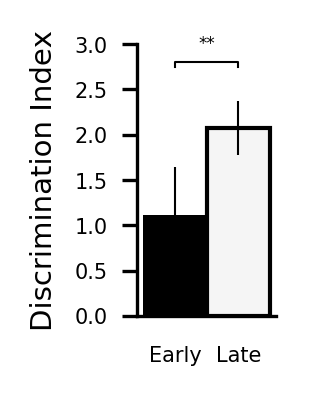

In [60]:
from matplotlib.patches import Patch
labels = ['Early','Late']
area = 't'

#x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars

to_plot = ['pre','post']

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(.6,1.2))
pvs=[]

for day in to_plot:
    if day == 'pre':
        exec("e = np.array(np.std(%s_di_%s))"%(day,area))
        exec("ax.bar(0 + width/2, np.mean(%s_di_%s), width, color='k',yerr=e)"%(day,area))
    if day == 'post':
        exec("l = np.array(np.std(%s_di_%s))"%(day,area))
        exec("ax.bar(0 + width+width/2,  np.mean(%s_di_%s), width,color='whitesmoke', edgecolor='k',yerr=l)"%(day,area))
exec("pvs.append(add_significance(ax, pre_di_%s, post_di_%s,width/2,width+width/2,2.8))"%(area,area))
   
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Discrimination Index')
#ax.set_title('Decoding During CS')
ax.set_ylim(0,3)
x=[width/2,width/2+width]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='x',bottom=False)

        #max(np.mean(mean_scores_gmin_tb_6Discrimination_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
#pl.suptitle('Discrimination Index',y=1.06,fontsize=8)
fig.savefig('../../../results/final-ish figures/%s_4odor_all_mice_di_bars.pdf'%NOTEBOOK_NAME)


0.0151914109883


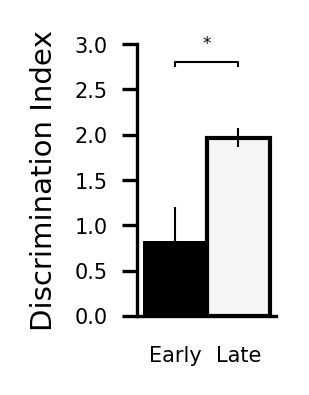

In [61]:
from matplotlib.patches import Patch
labels = ['Early','Late']
area = 'v'

#x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars

to_plot = ['pre','post']

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(.6,1.2))
pvs=[]

for day in to_plot:
    if day == 'pre':
        exec("e = np.array(np.std(%s_di_%s))"%(day,area))
        exec("ax.bar(0 + width/2, np.mean(%s_di_%s), width, color='k',yerr=e)"%(day,area))
    if day == 'post':
        exec("l = np.array(np.std(%s_di_%s))"%(day,area))
        exec("ax.bar(0 + width+width/2,  np.mean(%s_di_%s), width,color='whitesmoke', edgecolor='k',yerr=l)"%(day,area))
exec("pvs.append(add_significance(ax, pre_di_%s, post_di_%s,width/2,width+width/2,2.8))"%(area,area))
   
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Discrimination Index')
#ax.set_title('Decoding During CS')
ax.set_ylim(0,3)
x=[width/2,width/2+width]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='x',bottom=False)

        #max(np.mean(mean_scores_gmin_tb_6Discrimination_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
#pl.suptitle('Discrimination Index',y=1.06,fontsize=8)
fig.savefig('../../../results/final-ish figures/%s_4odor_ventral_mice_di_bars.pdf'%NOTEBOOK_NAME)


0.0744573365894


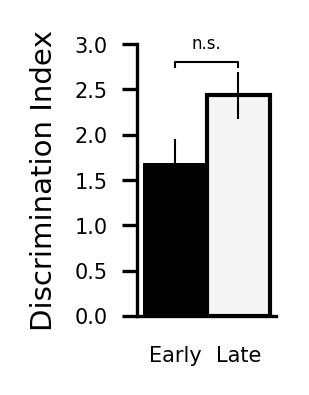

In [62]:
from matplotlib.patches import Patch
labels = ['Early','Late']
area = 'd'

#x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars

to_plot = ['pre','post']

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(.6,1.2))
pvs=[]

for day in to_plot:
    if day == 'pre':
        exec("e = np.array(np.std(%s_di_%s))"%(day,area))
        exec("ax.bar(0 + width/2, np.mean(%s_di_%s), width, color='k',yerr=e)"%(day,area))
    if day == 'post':
        exec("l = np.array(np.std(%s_di_%s))"%(day,area))
        exec("ax.bar(0 + width+width/2,  np.mean(%s_di_%s), width,color='whitesmoke', edgecolor='k',yerr=l)"%(day,area))
exec("pvs.append(add_significance(ax, pre_di_%s, post_di_%s,width/2,width+width/2,2.8))"%(area,area))
   
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Discrimination Index')
#ax.set_title('Decoding During CS')
ax.set_ylim(0,3)
x=[width/2,width/2+width]
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='x',bottom=False)

        #max(np.mean(mean_scores_gmin_tb_6Discrimination_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
#pl.suptitle('Discrimination Index',y=1.06,fontsize=8)
fig.savefig('../../../results/final-ish figures/%s_4odor_dorsal_mice_di_bars.pdf'%NOTEBOOK_NAME)


In [144]:
save_workspace(db)

Could not store variable 'di'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'np'. Skipping...
